## Clusturring

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customer_transactions = pd.merge(transactions, customers, on='CustomerID')
customer_data = customer_transactions.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    num_transactions=('TotalValue', 'count'),
    product_preferences=('ProductID', 'nunique')
).reset_index()


In [9]:
customer_data = pd.merge(customer_data, customers[['CustomerID',  'Region']], on='CustomerID')


In [10]:
features = customer_data[['total_spending', 'num_transactions', 'product_preferences']]


In [11]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

In [12]:
dbi_scores = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    
    
    dbi = davies_bouldin_score(normalized_data, kmeans.labels_) # Calculate Davies Index
    dbi_scores.append(dbi)
    
    
    silhouette = silhouette_score(normalized_data, kmeans.labels_) #  Silhouette Score
    silhouette_scores.append(silhouette)

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\conda\Lib\sit

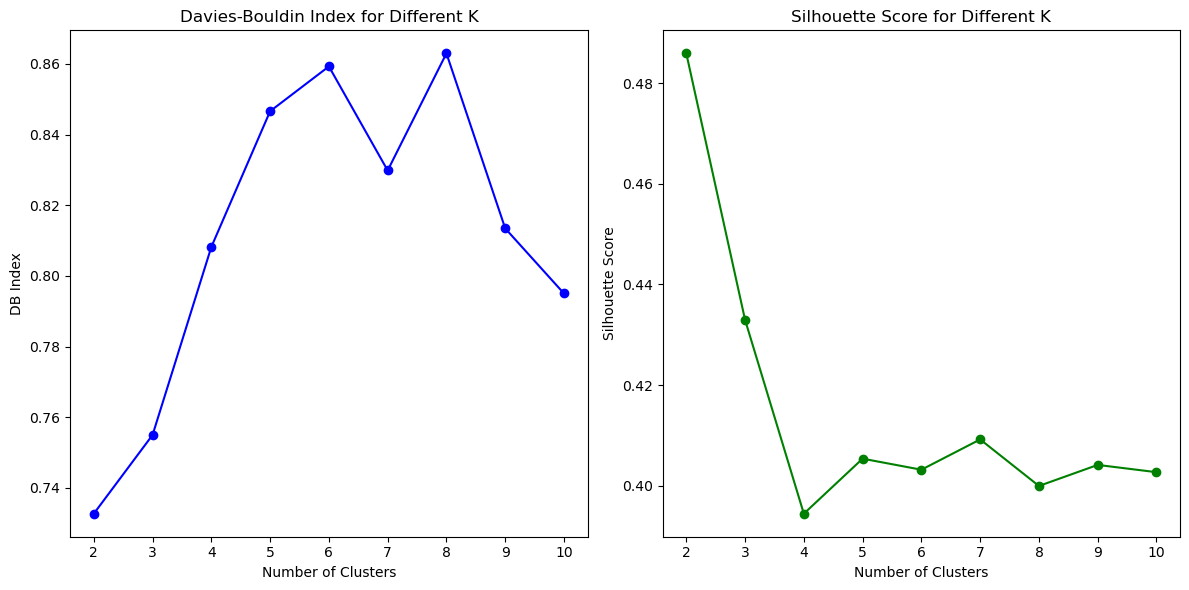

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, dbi_scores, marker='o', color='blue')
plt.title('Davies-Bouldin Index for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [14]:
optimal_k = k_range[dbi_scores.index(min(dbi_scores))] 
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [15]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_data)

customer_data['Cluster'] = kmeans.labels_

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


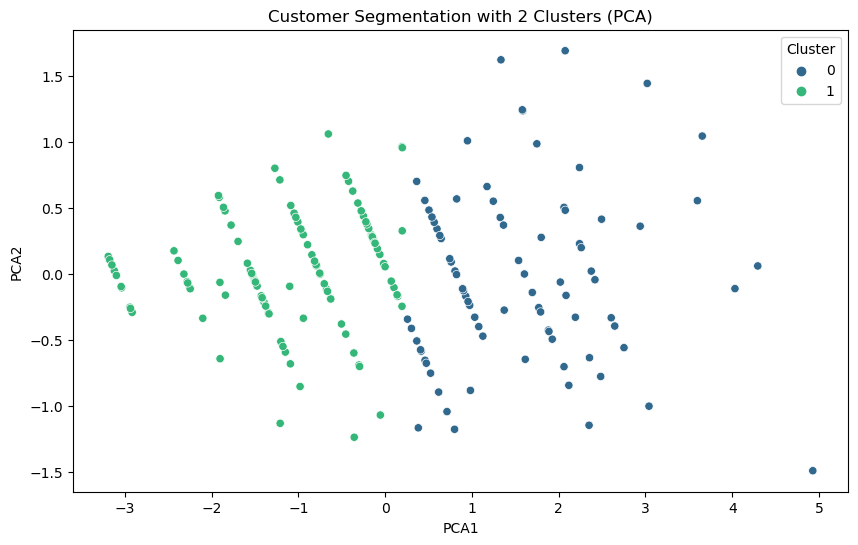

In [16]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
customer_data['PCA1'] = reduced_data[:, 0]
customer_data['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='viridis')
plt.title(f'Customer Segmentation with {optimal_k} Clusters (PCA)')
plt.show()

In [17]:
customer_data[['CustomerID', 'Cluster']].to_csv('Ravi_Kumar_Clustered_Customers.csv', index=False)
print("Done")

Done
